## Comparing Storm and No Storm Data Recorded Every Hour

The two data sets below each contain data of solar storm events being measured every hour. The rows alternate between storm and no storm. Each column is a different hour. By is the component in the Y
direction of the interplanetary magnetic field, and Bx is the X direction. Each data set has 16 storm and 16 non storm events. Each event has 89 observations 

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
by=pd.read_excel('/Users/isabellareeser/DSCI_222/data_By.xlsx', header=None)
bx=pd.read_excel('/Users/isabellareeser/DSCI_222/data_Bx.xlsx', header=None)

Turning each file into an array, reshaping them, swapping the axes so that the storm and no storm data are separated in each, then concatenating both so that you can acces each set of data separately

In [5]:
by_arr=np.array(by)
bx_arr=np.array(bx)

by_new=by_arr.reshape(16,2,89)
bx_new=bx_arr.reshape(16,2,89)

By_new=by_new.swapaxes(0,1)
Bx_new=bx_new.swapaxes(0,1)

bybx=np.concatenate([By_new,Bx_new])

## Summary Statistics

Calculating mean for By and Bx alone:

In [6]:
np.mean(bybx[0])

-0.24296569873570908

In [7]:
np.mean(bybx[1])

0.09494044883254898

In [8]:
np.mean(bybx[2])

0.26626320728766095

In [9]:
np.mean(bybx[3])

0.2107301378471998

Calculating median for By and Bx alone:

In [10]:
np.median(bybx[0])

-1.0539017857142854

In [11]:
np.median(bybx[1])

0.41640178571428577

In [12]:
np.median(bybx[2])

1.039240288220551

In [13]:
np.median(bybx[3])

0.06921475563909782

Calculating standard deviation for By and Bx alone:

In [14]:
np.std(bybx[0])

7.311413543155606

In [15]:
np.std(bybx[1])

3.7323679884640906

In [16]:
np.std(bybx[2])

6.050970179315022

In [17]:
np.std(bybx[3])

3.5254685399158707

Calculating variance for By and Bx alone:

In [18]:
np.var(bybx[0])

53.45676799903921

In [19]:
np.var(bybx[1])

13.93057080131148

In [20]:
np.var(bybx[2])

36.61424011095966

In [21]:
np.var(bybx[3])

12.42892842593654

## Summary Statistics For By Vs. Bx

### By Data
| Storm | No Storm |
| :- | -: |
|Mean: -0.24296569873570908|Mean: 0.09494044883254898| 
|Median: -1.0539017857142854|Median: 0.41640178571428577| 
|Standard Dev: 7.311413543155606|Standard Dev: 3.73236798846409|
|Variance: 53.45676799903921|Variance: 13.930570801311479|

Based on the data, the mean and median for no storm data is higher than storm data. The higher variance and standard deviation of the storm data versus the no storm data implies that storm data is more spread out from the mean than no storm.

### Bx Data
| Storm | No Storm |
| :- | -: |
|Mean: 0.26626320728766095|Mean: 0.2107301378471998| 
|Median: 1.039240288220551|Median: 0.06921475563909782| 
|Standard Dev: 6.050970179315023|Standard Dev: 3.5254685399158707|
|Variance: 36.61424011095968|Variance: 12.42892842593654|

Based on the data, the mean and median for storm data is higher than no storm data. The higher variance and standard deviation also lies under storm data meaning that storm data is more spread out from the mean than no storm data.

To compare the two, no storm data has a higher mean and median for the Y direction of the interplanetary magnetic field, whereas storm data has a higher mean and median for the X direction of the interplanetary magnetic field. In both, the variance and standard deviation is higher for storm data. Therfore, both sets of storm data are more spread out from the mean than no storm.

## Correlation and Plots

Calculating the correlation vales between By and Bx for storm and no storm

In [25]:
def corr(arr1,arr2):
    corrs=[]
    for i in range(len(arr1)):
        x=np.corrcoef(arr1[i],arr2[i])
        corrs.append(x[0,1])
    return corrs
storm_corr=corr(bybx[0],bybx[1])
nostorm_corr=corr(bybx[2],bybx[3])

In [26]:
storm_corr

[0.052973167698514005,
 -0.11470072412005043,
 -0.3252285526998404,
 0.0984294002945319,
 0.06379039173894907,
 -0.19153678190068268,
 0.15968060026576897,
 -0.07939428833495203,
 -0.11096394705548239,
 -0.22689989648215583,
 -0.21331404111496152,
 0.10188783789780556,
 0.12603247094325243,
 -0.12413627923211903,
 -0.40289682818687955,
 0.31261636882708177]

In [28]:
nostorm_corr

[0.3524347456359929,
 -0.3345004234069406,
 0.18252137658983222,
 0.4448687030718336,
 0.229343054776337,
 0.11354882921273944,
 0.5390141124520641,
 -0.21349865301634918,
 0.3857185956804766,
 0.046541594138642846,
 0.4266002932856023,
 -0.07013614109686911,
 0.30280979226352345,
 0.5286538543124858,
 0.18141055921348886,
 -0.02541528484166085]

Plotting each set of correlation values in a histogram and kernel density plot

Text(0.5, 1.0, 'Correlation of By and Bx Storm Data')

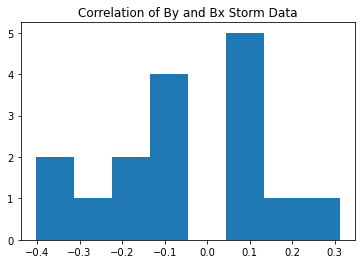

In [549]:
plt.hist(storm_corr, bins=int(16/2))
plt.title("Correlation of By and Bx Storm Data")

Text(0.5, 1.0, 'Correlation of By and Bx No Storm Data')

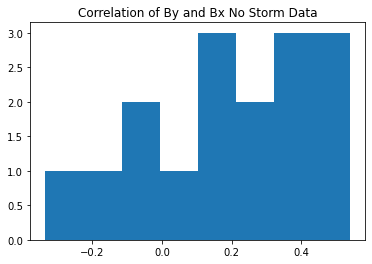

In [550]:
plt.hist(nostorm_corr, bins=int(16/2))
plt.title("Correlation of By and Bx No Storm Data")

Text(0.5, 1.0, 'Kernel Density Estimate of By and Bx Storm Data')

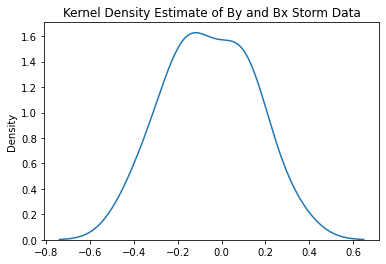

In [551]:
sns.kdeplot(storm_corr)
plt.title("Kernel Density Estimate of By and Bx Storm Data")

Text(0.5, 1.0, 'Kernel Density Estimate of By and Bx No Storm Data')

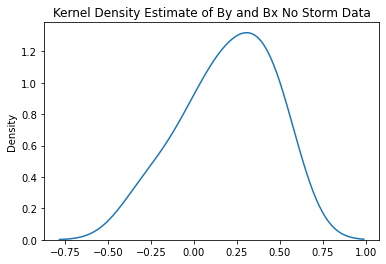

In [552]:
sns.kdeplot(nostorm_corr)
plt.title("Kernel Density Estimate of By and Bx No Storm Data")

Looking at the storm correlations, the empty spot in the histogram is shown by the dip in the curve in the kernel density plot. Looking at the no storm correlations, the histogram is more evenly distributed shown by the more normal curve in the kernel density plot

Putting both storm and no storm correlations into one boxplot:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4bce667c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4bce66c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4bce66550>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb4bce761f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4bce764c0>,
 'means': []}

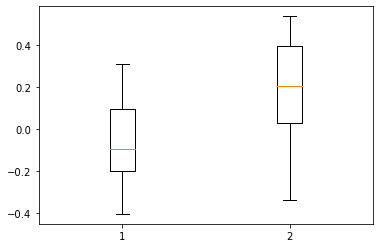

In [553]:
data=[storm_corr, nostorm_corr]
plt.boxplot(data)

The interquartile range for the no storm correlations is more equally distributed than storm correlations. Therefore, the data for the storm correlations is more spread out than the data for the no storm correlations.

## Only Data from the Start to Hour 44

In [29]:
by_stormarr=bybx[0]
by_storm=by_stormarr[:,:43]

by_nostormarr=bybx[1]
by_nostorm=by_nostormarr[:,:43]

In [30]:
bx_stormarr=bybx[2]
bx_storm=bx_stormarr[:,:43]

bx_nostormarr=bybx[3]
bx_nostorm=bx_nostormarr[:,:43]

Calculating mean for By and Bx alone:

In [558]:
np.mean(by_storm)

-1.0858824442410413

In [559]:
np.mean(by_nostorm)

-0.08531912721483947

In [560]:
np.mean(bx_storm)

1.5011136208797233

In [561]:
np.mean(bx_nostorm)

0.9777470001311417

Calculating median for By and Bx alone:

In [562]:
np.median(by_storm)

-1.3547321428571428

In [563]:
np.median(by_nostorm)

0.26352678571428567

In [564]:
np.median(bx_storm)

2.3087946428571433

In [565]:
np.median(bx_nostorm)

1.1299107142857143

Calculating standard deviation for By and Bx alone:

In [566]:
np.std(by_storm)

2.6042939510536156

In [567]:
np.std(by_nostorm)

3.7664308351186335

In [568]:
np.std(bx_storm)

3.4718561382525155

In [569]:
np.std(bx_nostorm)

3.577174691999427

Calculating variance for By and Bx alone:

In [570]:
np.var(by_storm)

6.782346983494452

In [571]:
np.var(by_nostorm)

14.186001235732446

In [572]:
np.var(bx_storm)

12.053785044721671

In [573]:
np.var(bx_nostorm)

12.796178777081195

### By Data to Hour 44
| Storm | No Storm |
| :- | -: |
|Mean: -1.0858824442410413|Mean: -0.08531912721483947| 
|Median: -1.3547321428571428|Median: 0.26352678571428567| 
|Standard Dev: 2.6042939510536156|Standard Dev: 3.7664308351186335|
|Variance: 6.782346983494452|Variance: 14.186001235732446|

### Bx Data to Hour 44
| Storm | No Storm |
| :- | -: |
|Mean: 1.5011136208797233|Mean: 0.9777470001311417| 
|Median: 2.3087946428571433|Median: 1.1299107142857143| 
|Standard Dev: 3.4718561382525155|Standard Dev: 3.577174691999427|
|Variance: 12.053785044721671|Variance: 12.796178777081195|

In [31]:
def corr(arr1,arr2):
    corrs=[]
    for i in range(len(arr1)):
        x=np.corrcoef(arr1[i],arr2[i])
        corrs.append(x[0,1])
    return corrs
storm_corr_f=corr(by_storm,bx_storm)
nostorm_corr_f=corr(by_nostorm,bx_nostorm)

In [32]:
storm_corr_f

[-0.35660180577336986,
 -0.3731700695329083,
 0.5922390488229322,
 0.5825978238673629,
 0.04935784311345207,
 0.18026603888712878,
 -0.6435412824662173,
 0.08836597953041078,
 -0.7012594086258518,
 0.5901092272185507,
 0.16689437902137835,
 -0.5058654070086616,
 0.22191414307742596,
 -0.44061102426681886,
 0.014925728851330393,
 0.07102362937484223]

In [33]:
nostorm_corr_f

[-0.3540557805863158,
 -0.795100546705461,
 0.2292575862997492,
 -0.3311780632928261,
 0.5883002157051396,
 -0.3473309711586561,
 -0.43792853133915854,
 0.12684523690086638,
 0.2656819677332185,
 -0.05706622805134835,
 0.7894784599073433,
 -0.5976777765493797,
 0.8641879829789145,
 -0.525615293704208,
 0.313048600654473,
 0.5074171375290578]

Text(0.5, 1.0, 'Correlation of By and Bx Storm Data')

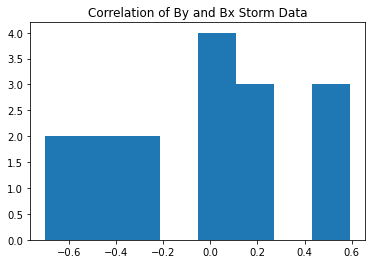

In [575]:
plt.hist(storm_corr_f, bins=int(16/2))
plt.title("Correlation of By and Bx Storm Data")

Text(0.5, 1.0, 'Correlation of By and Bx Storm Data')

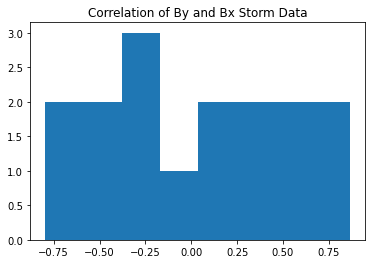

In [576]:
plt.hist(nostorm_corr_f, bins=int(16/2))
plt.title("Correlation of By and Bx Storm Data")

Text(0.5, 1.0, 'Kernel Density Estimate of By and Bx Storm Data')

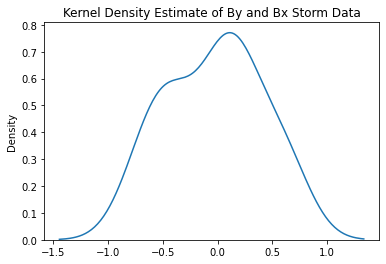

In [577]:
sns.kdeplot(storm_corr_f)
plt.title("Kernel Density Estimate of By and Bx Storm Data")

Text(0.5, 1.0, 'Kernel Density Estimate of By and Bx Storm Data')

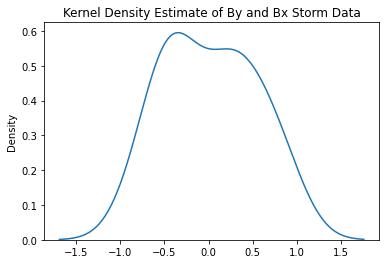

In [578]:
sns.kdeplot(nostorm_corr_f)
plt.title("Kernel Density Estimate of By and Bx Storm Data")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4cd506f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4cd516520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4cd506c70>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb4cd516ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4cd516d90>,
 'means': []}

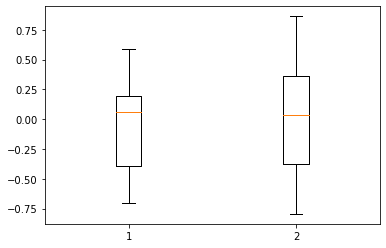

In [579]:
data=[storm_corr_f, nostorm_corr_f]
plt.boxplot(data)

1 is storm and 2 is no storm

Even when we only look at the data until hour 44, we get very similar results and can make the same conclusions. The one difference though is that the kernel density plot for no storm correlations now also has a dip in it. However, the one for storm correlations still has a greater dip and is overall still more spread out from the mean

## Conclusion

Overall, the storm data showed to be more spread out from the mean while the no storm data showed to be more evenly distributed.